In [2]:
data<- read.csv("protein.csv")
head(data)

Country,RedMeat,WhiteMeat,Eggs,Milk,Fish,Cereals,Starch,Nuts,Fr.Veg
Albania,10.1,1.4,0.5,8.9,0.2,42.3,0.6,5.5,1.7
Austria,8.9,14.0,4.3,19.9,2.1,28.0,3.6,1.3,4.3
Belgium,13.5,9.3,4.1,17.5,4.5,26.6,5.7,2.1,4.0
Bulgaria,7.8,6.0,1.6,8.3,1.2,56.7,1.1,3.7,4.2
Czechoslovakia,9.7,11.4,2.8,12.5,2.0,34.3,5.0,1.1,4.0
Denmark,10.6,10.8,3.7,25.0,9.9,21.9,4.8,0.7,2.4


In [3]:
library(dplyr)
glimpse(data)

Warning message:
"package 'dplyr' was built under R version 3.6.3"
Attaching package: 'dplyr'

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union



Rows: 25
Columns: 10
$ Country   <fct> Albania, Austria, Belgium, Bulgaria, Czechoslovakia, Denmark~
$ RedMeat   <dbl> 10.1, 8.9, 13.5, 7.8, 9.7, 10.6, 8.4, 9.5, 18.0, 10.2, 5.3, ~
$ WhiteMeat <dbl> 1.4, 14.0, 9.3, 6.0, 11.4, 10.8, 11.6, 4.9, 9.9, 3.0, 12.4, ~
$ Eggs      <dbl> 0.5, 4.3, 4.1, 1.6, 2.8, 3.7, 3.7, 2.7, 3.3, 2.8, 2.9, 4.7, ~
$ Milk      <dbl> 8.9, 19.9, 17.5, 8.3, 12.5, 25.0, 11.1, 33.7, 19.5, 17.6, 9.~
$ Fish      <dbl> 0.2, 2.1, 4.5, 1.2, 2.0, 9.9, 5.4, 5.8, 5.7, 5.9, 0.3, 2.2, ~
$ Cereals   <dbl> 42.3, 28.0, 26.6, 56.7, 34.3, 21.9, 24.6, 26.3, 28.1, 41.7, ~
$ Starch    <dbl> 0.6, 3.6, 5.7, 1.1, 5.0, 4.8, 6.5, 5.1, 4.8, 2.2, 4.0, 6.2, ~
$ Nuts      <dbl> 5.5, 1.3, 2.1, 3.7, 1.1, 0.7, 0.8, 1.0, 2.4, 7.8, 5.4, 1.6, ~
$ Fr.Veg    <dbl> 1.7, 4.3, 4.0, 4.2, 4.0, 2.4, 3.6, 1.4, 6.5, 6.5, 4.2, 2.9, ~


In [4]:
data1<-data[c(2,3,4,5,6,7)]

In [15]:
library(purrr)

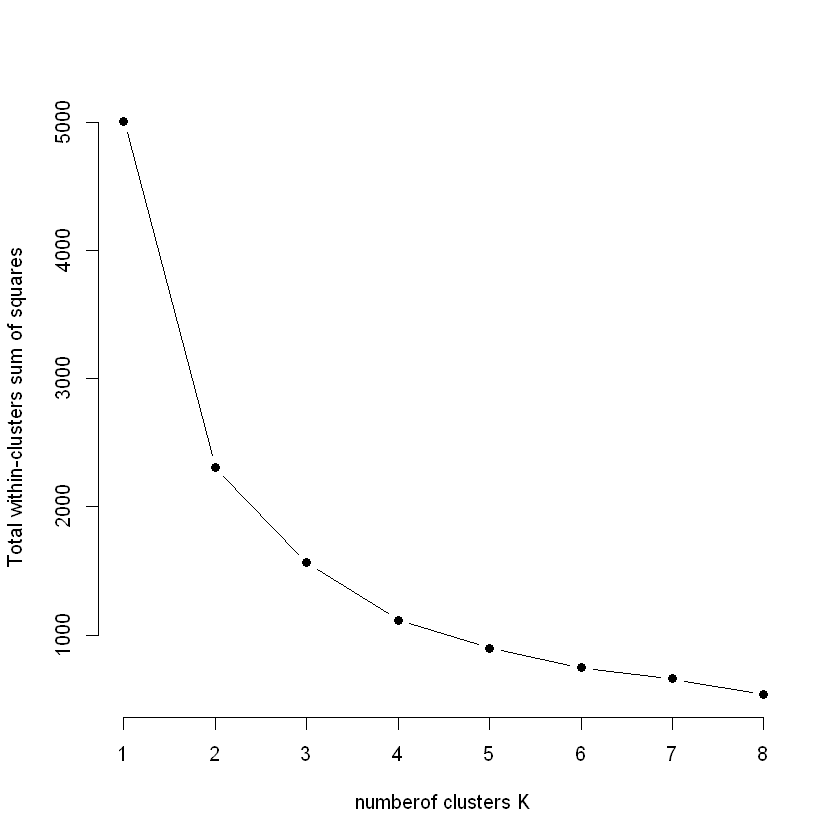

In [16]:
wss <- function(k){
    kmeans(data1,k,nstart=10)$tot.withinss
} 
k.values <- 1:8

wss_values<-map_dbl(k.values,wss)
plot(k.values,wss_values,
    type="b", pch=19,frame=FALSE,
    xlab="numberof clusters K",
    ylab="Total within-clusters sum of squares")

In [5]:
kmeans.re<-kmeans(data1,3,nstart=20)
kmeans.re

K-means clustering with 3 clusters of sizes 6, 12, 7

Cluster means:
    RedMeat WhiteMeat     Eggs Milk     Fish  Cereals
1  8.000000  4.383333 1.616667 12.0 1.983333 48.30000
2 12.091667  9.441667 3.708333 23.0 4.991667 24.02500
3  7.514286  8.257143 2.742857 11.4 5.042857 32.58571

Clustering vector:
 [1] 1 2 2 1 3 2 3 2 2 1 3 2 3 2 2 3 3 1 3 2 2 2 1 2 1

Within cluster sum of squares by cluster:
[1] 385.3650 620.0992 559.4286
 (between_SS / total_SS =  68.7 %)

Available components:

[1] "cluster"      "centers"      "totss"        "withinss"     "tot.withinss"
[6] "betweenss"    "size"         "iter"         "ifault"      

In [11]:
head(data1)

RedMeat,WhiteMeat,Eggs,Milk,Fish,Cereals
10.1,1.4,0.5,8.9,0.2,42.3
8.9,14.0,4.3,19.9,2.1,28.0
13.5,9.3,4.1,17.5,4.5,26.6
7.8,6.0,1.6,8.3,1.2,56.7
9.7,11.4,2.8,12.5,2.0,34.3
10.6,10.8,3.7,25.0,9.9,21.9


In [8]:
library(cluster)

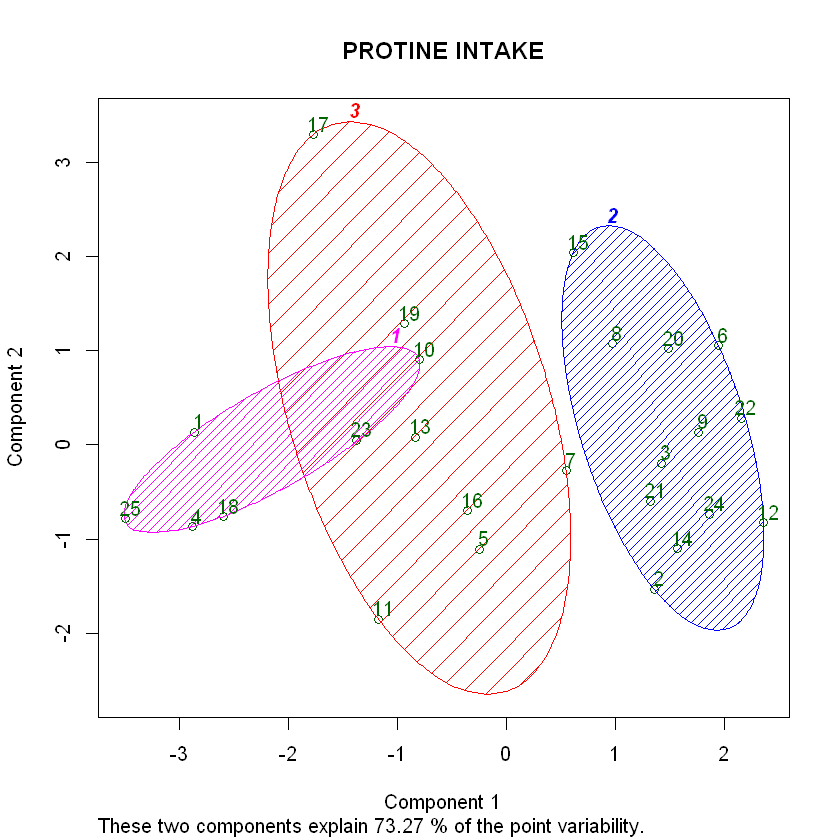

In [12]:
y_kmeans <- kmeans.re$cluster
clusplot(data1[, c("RedMeat","WhiteMeat","Eggs","Milk","Fish","Cereals")],
         y_kmeans,
         lines = 0,
         shade = TRUE,
         color = TRUE,
         labels = 2,
         plotchar = FALSE,
         span = TRUE,
         main = paste("PROTINE INTAKE"))